Boolean vector: bool_opt =  [1. 1. 1. 0. 0.]
The x-value of the tendency point T is approx.  1.707106781185


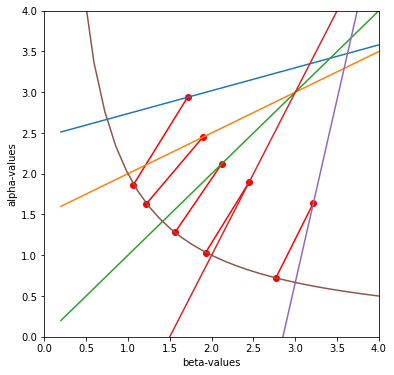

learning rate =  0.1


In [5]:
#Note: We program a simple NN to interpolate a linear function.

import matplotlib.pyplot as plt
#generating random data from a linear function and adding noise
#generate x-values uniformly inside the interval [0,1]
import numpy as np
X_data = np.random.uniform(0, 1, 1000)

#generate noise with normal distribution
noise = np.random.normal(0, 0.1, X_data.size)

#generate values of the linear function: f(x) = alpha_prime * x
#and add the noise
alpha_prime = 2
y_data = alpha_prime * X_data + noise


#building the model
#import the necessary functions from the tensorflow library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

#introduce the learning model: one hidden layer and one hidden node
model = Sequential()
model.add(Dense(1, input_dim=1, activation='relu', use_bias=True))
model.add(Dense(1, activation='linear', use_bias=True))


#generate some points which lie on the graph alpha_prime/x (base points)
#thex_values correspond to the beta-values of such points
x_values = np.array([0.75, 1.0, 1.41421356237, 2, 3])

#compute the corresponding alpha_values
y_values = alpha_prime/x_values

#distance (along the gradient line) from points on the graph
d=1

#generating the new points; wich will give us the initial values of the weights
#for a given point (x_base,2/x_base) we calculate the value (at the x-value x) of the perpendicular line on the 
#graph alpha_prime/x which goes through the point (x_base,2/x_base)

#function of the gradient line at the position x_base
def perpendicular(x_base,x):
    return x_base**2 /alpha_prime * x + alpha_prime/x_base - x_base**3 /alpha_prime

#calculate the x-value of the point which is a distance of d away from a base point on alpha_prime/x and which lies
#on the perpendicular line to this base point

#computes the x_value of the point which is distance d aways from x_base.. 
#..on the graph along the gradient line
def x_distance(d, x_base):
    return x_base + np.sqrt(d**2 * 1/(1+(x_base**4 / alpha_prime**2)))


#compute the initial weights (beta,alpha)
x_weight = x_distance(d, x_values) #betas
y_weight = perpendicular(x_values, x_weight) #corresponding alphas


#make plot larger so see small chnges better
plt.figure(figsize=(6,6))
plt.ylim((0,4))
plt.xlim((0,4))
plt.xlabel('beta-values')
plt.ylabel('alpha-values')


#for all initial weights (alpha,beta) optimize the model and plot where the points are sent
l = len(x_values)

#defining the bool vector which will allow us to store the tendency point pattern.
#we will set bool_opt[i]=0, if the i-th point optimizes left of its initial gradient line
#and bool_opt[i]=1, if the i-th point converges right of its initial gradient line and
#bool_opt[i]=2, if the i-th point converges very close to its initial gradient line
bool_opt = np.zeros(l)


for i in range(l):
    beta_init = x_weight[i] #beta corresponds to x
    alpha_init = y_weight[i]  #alpha corresponds to y
    b_init = 0
    h_init = 0

    model.set_weights([np.array([[beta_init]]), np.array([b_init]), np.array([[alpha_init]]), np.array([h_init])])

    #compile the keras model
    #set some custom learning rate:
    l_rate= 0.1

    #set optimization parameters
    opt = keras.optimizers.SGD(learning_rate=l_rate)
    model.compile(loss='mean_squared_error', optimizer=opt)

    #fit the keras model on the dataset
    model.fit(X_data, y_data, epochs=150, batch_size=20, verbose = 0)

    #get the weights of the NN
    [[[beta]], [b], [[alpha]], [h]] = model.get_weights()

    #plot point before and after optimization (and connect these points)
    plt.plot([beta_init, beta], [alpha_init,alpha], 'ro-')
    
    #plot the gradient line on which the initial values lie
    x = np.linspace(0.2,4,30)
    y_perpline = perpendicular(x_values[i],x)
    plt.plot(x, y_perpline)
    
    #storge the tendency value pattern.
    if abs(beta-x_values[i]) <= 0.001:
            bool_opt[i] = 2
    else: 
        if beta > x_values[i] : #so if the optimized point lies left of the gradient line
            bool_opt[i] = 1
        else:
            bool_opt[i] = 0
    
#find out the approximate value of the tendency point
#x_tendency stays zero, if the vector does not have a desired form
print('Boolean vector: bool_opt = ', bool_opt)
for k in range(l-1):
    if bool_opt[k] == 2:
        x_tendency = x_values[k]
        break
    if (bool_opt[k]) == 1.0 and (bool_opt[k+1]) == 0.0:
        x_tendency = (x_values[k] + x_values[k+1])/2
        break
if bool_opt[l-1] == 2:
    x_tendency == x_values[l-1]
print('The x-value of the tendency point T is approx. ',x_tendency)

    
    
    


#plot the graph alpha_prime/x
x = np.linspace(0.2,4,30)
y = alpha_prime/x
plt.plot(x,y)
plt.show()
print('learning rate = ', l_rate)